In [1]:
import pandas as pd
import numpy as np
import nltk
import seaborn as sns
import re
from scipy.stats import chi2_contingency

In [2]:
essays = pd.read_csv('../data/essays.csv', sep='|')

In [3]:
def split_sentences(text):
    regex =  r'(?<=[.!?])\s*(?=(?:[^"]*"[^"]*")*[^"]*$)'  # Expressão regular para separar as sentenças

    sentences = re.split(regex, text)

    return sentences

In [4]:
ths = [v for v in range(50, 101, 10)]

In [5]:

def check_sent(row):
    sentences = split_sentences(row['text'].replace('\n', ''))
    info = {}
    info['essay'] = row['essay']
    sent_lens = []
    for th in ths:
        info[f'{th}'] = 0
    for sent in sentences[:-1]:
        words = nltk.word_tokenize(sent)
        words = [w for w in words if w[0].isalpha()]
        sent_lens.append(len(words))
        for th in ths:
            if len(words) > th:
                info[f'{th}'] += 1
    info['median'] = np.median(sent_lens)
    return info
    
essays_ths = essays.apply(check_sent, axis=1).to_list()

c:\Users\mario\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\mario\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [6]:
essays_df = pd.DataFrame(essays_ths)
essays_df = essays_df.merge(essays, on='essay')

<Axes: xlabel='70', ylabel='comp1'>

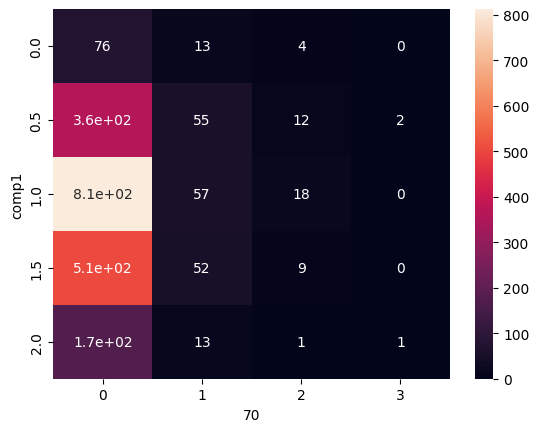

In [21]:
sns.heatmap(pd.crosstab(essays_df['comp1'],essays_df['70']), annot=True)

In [17]:
print('Chi2 test')
print('threshold', 'p-value')
for value in ths[1:]:
    teste = chi2_contingency(pd.crosstab(essays_df[f'{value}'], essays_df['comp1'])).pvalue
    print(value, '\t' ,teste)

Chi2 test
threshold p-value
60 	 0.07626121041999709
70 	 0.000701266254495735
80 	 0.0007326634097211204
90 	 0.0014414107742392497
100 	 0.024498104333108745


In [42]:
#get 'how many' elements with more than 60 sentences and each score in comp1
essays_df.groupby('comp1').agg({'60': 'sum'})

,60
comp1,
0.0,35
0.5,146
1.0,207
1.5,152
2.0,42


In [35]:
essays_df.groupby('comp1').agg({'30': 'sum'})

,30
comp1,
0.0,205
0.5,1082
1.0,2441
1.5,1600
2.0,562


In [36]:
essays_df.groupby('comp1').agg({'70': 'sum'})

,70
comp1,
0.0,21
0.5,85
1.0,93
1.5,70
2.0,18


In [37]:
essays_df.groupby('comp1').agg({'80': 'sum'})

,80
comp1,
0.0,9
0.5,47
1.0,41
1.5,34
2.0,8


In [38]:
essays_df.groupby('comp1').agg({'40': 'sum'})

,40
comp1,
0.0,99
0.5,510
1.0,1085
1.5,718
2.0,240


In [22]:
essays_df.groupby('comp1').agg({'50': 'sum'})

,50
comp1,
0.0,61
0.5,258
1.0,476
1.5,316
2.0,97
